## Изучение закономерностей, определяющих успешность игр

**Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).** 

**Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.**

## Загрузка данных и изучение общей информации

### Загрузка данных

Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

Загрузка данных

In [2]:
games = pd.read_csv('/datasets/games.csv')

### Изучение общей информации

Получение общей информации о датафрейме

In [3]:
games.info()
display(games)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Вывод

Датафрейм содержит 16715 строк и 11 колонок.

**Описание данных:**

**Name** — название игры

**Platform** — платформа

**Year_of_Release** — год выпуска

**Genre** — жанр игры

**NA_sales** — продажи в Северной Америке (миллионы проданных копий)

**EU_sales** — продажи в Европе (миллионы проданных копий)

**JP_sales** — продажи в Японии (миллионы проданных копий)

**Other_sales** — продажи в других странах (миллионы проданных копий)

**Critic_Score** — оценка критиков (максимум 100)

**User_Score** — оценка пользователей (максимум 10)

**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Несоответствие типов данных:**

Year_of_Release - тип данных float, нужен int

User_Score - тип данных object, нужен float

В первых строках датафрейма наблюдается наличие пропусков. Необходимо подготовить данные к анализу, исправить тип данных, провести работу с пропусками и проверить на наличие дубликатов.

## Предобработка данных

### Замена названия столбцов (приведение к нижнему регистру)

In [4]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков

Наличие пропусков в датафрейме

In [5]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Наличие пропусков в процентном соотношении

In [6]:
(games.isnull().sum() /len(games))*100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

*Больше половины всех значений пропусков (51%) содержится в столбце critic_score.
Чуть меньше половины пропусков (40%) содержится в столбцах user_score и rating.
Около 2% пропусков содержится в столбце year_of_release.
И менее 1 % пропусков содержится в столбцах name и genre.
В остальных столбцах пропусков не обнаружено.*

Удалим пропуски в столбцах name, genre, year_of_release так как они в сумме составляют меньше 2% всех данных.

In [7]:
games = games.dropna(subset=['year_of_release'])
games = games.dropna(subset=['name'])
games = games.dropna(subset=['genre'])

Проверим количество удаленных строк

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**Для обработки пропусков в столбце rating изучим его**

In [9]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Рассмотрим абревеатуры Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде:

EC — Early Childhood «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры; Устаревшая градация.

E — Everyone «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально K-A ("Kids to Adults");

E10+ — Everyone 10+ «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови;

T — Teen «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики;

M — Mature «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории;

AO — Adults Only Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением;

RP — Rating Pending Рейтинг ожидается.


Таким образом значение рейтинга K-A можно заменить на E

In [10]:
games.loc[games['rating'] == 'K-A', 'rating'] = 'E'

Организация ESRB была основана в 1994 году, посмотрим связано ли наличие пропусков с этим фактом

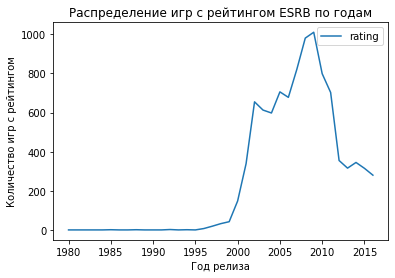

In [11]:
plots = games.groupby('year_of_release')['rating'].count().reset_index().plot(x='year_of_release')
plt.xlabel('Год релиза')
plt.ylabel('Количество игр с рейтингом')
plt.title('Распределение игр с рейтингом ESRB по годам')
plt.show()

По графику видно, что количество игр с присвоенным рейтингом начало увеличиваться только после 1995 года. Таким образом, пропуски в этом столбце связаны с фактом основания организации ESRB и поэтому, их можно заполнить условным обозначением "unrated".

In [12]:
games['rating'] = games['rating'].fillna('unrated')

**Для обработки пропусков в столбце user_score изучим его**

In [13]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Вдно значение tbt.

*TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.*

Таким образом, это тот же пропуск.

In [14]:
games.user_score.replace('tbd', np.nan, inplace=True)

**Для обработки пропусков в столбце critic_score изучим его**

In [15]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [16]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Пропуски в столбцах critic_score и user_score имеют не определенную причину, однако их количество практически совпадает, посмотрим не связано ли это с временным фактором

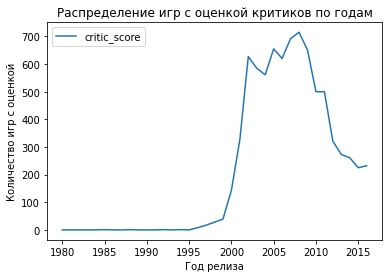

In [17]:
plots = games.groupby('year_of_release')['critic_score'].count().reset_index().plot(x='year_of_release')
plt.xlabel('Год релиза')
plt.ylabel('Количество игр с оценкой')
plt.title('Распределение игр с оценкой критиков по годам')
plt.show()

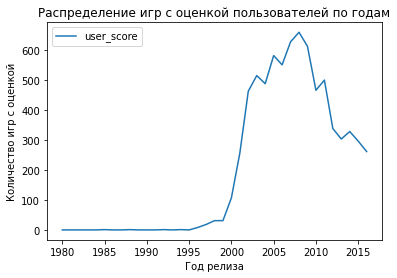

In [18]:
plots = games.groupby('year_of_release')['user_score'].count().reset_index().plot(x='year_of_release')
plt.xlabel('Год релиза')
plt.ylabel('Количество игр с оценкой')
plt.title('Распределение игр с оценкой пользователей по годам')
plt.show()

По графикам видно, что до 1995 года оценок не выставлялось, или данных о них нет. 

Проверим этап работы с пропусками

In [19]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [20]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### Преобразование данных в нужные типы

In [21]:
games['year_of_release'] = games['year_of_release'].astype('int')  

In [22]:
games['user_score'] = games['user_score'].astype('float')  

### Поиск дубликатов

In [23]:
games.duplicated().sum()

0

*Явные дубликаты отсутствуют*

Проверим данные на неполные дубликаты игр с одинаковым названием, годом релиза и патформой

In [24]:
games[['name', 'platform', 'year_of_release']].value_counts()

name                              platform  year_of_release
Madden NFL 13                     PS3       2012               2
 Beyblade Burst                   3DS       2016               1
Ratatouille                       PC        2007               1
Rapala Tournament Fishing!        X360      2006               1
Rapala Trophies                   PSP       2006               1
                                                              ..
Halo Wars                         X360      2009               1
Halo: Combat Evolved              PC        2003               1
                                  XB        2001               1
Halo: Combat Evolved Anniversary  X360      2011               1
¡Shin Chan Flipa en colores!      DS        2007               1
Length: 16443, dtype: int64

Обнаружено два дубликата, посмотрим на них

In [25]:
games[(games['name'] == 'Madden NFL 13')&(games['platform'] == 'PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Удалим неявный дубликат

In [26]:
games = games.drop(index=[16230])

Проверим работу

In [27]:
games[(games['name'] == 'Madden NFL 13')&(games['platform'] == 'PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E


In [28]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Поиск аномальных значений

На этапе работы с пропусками было замечено, что в столбцах с оценкой пользователей и критиков разная шкала оценки. У критиков она 100-бальная, а у пользователей 10-бальная.

В большинстве слуачев рейтинг оценивается по шкале от 1 до 10. Поэтому разделим значения в столбце critic_score на 10 и вернем обратно полученные значения.

In [29]:
games['critic_score'] = games['critic_score']/10

In [30]:
games['critic_score'].unique()

array([7.6, nan, 8.2, 8. , 8.9, 5.8, 8.7, 9.1, 6.1, 9.7, 9.5, 7.7, 8.8,
       8.3, 9.4, 9.3, 8.5, 8.6, 9.8, 9.6, 9. , 8.4, 7.3, 7.4, 7.8, 9.2,
       7.1, 7.2, 6.8, 6.2, 4.9, 6.7, 8.1, 6.6, 5.6, 7.9, 7. , 5.9, 6.4,
       7.5, 6. , 6.3, 6.9, 5. , 2.5, 4.2, 4.4, 5.5, 4.8, 5.7, 2.9, 4.7,
       6.5, 5.4, 2. , 5.3, 3.7, 3.8, 3.3, 5.2, 3. , 3.2, 4.3, 4.5, 5.1,
       4. , 4.6, 3.9, 3.4, 4.1, 3.6, 3.1, 2.7, 3.5, 2.6, 1.9, 2.8, 2.3,
       2.4, 2.1, 1.7, 1.3])

**Посмотрим какие уникальные значения присутствуют в столбце platform**

In [31]:
games['platform'].value_counts()

PS2     2127
DS      2121
PS3     1305
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

*Аномальных значений не выявлено*

**Посмотрим какие уникальные значения присутствуют в столбце year_of_release**

In [32]:
games['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

<AxesSubplot:ylabel='Frequency'>

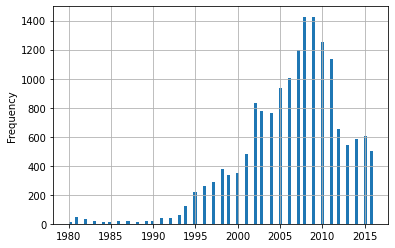

In [33]:
games['year_of_release'].plot(kind = 'hist', bins = 100, grid = True)

*Аномальных значений не выявлено*

**Посмотрим какие уникальные значения присутствуют в столбце genre**

In [34]:
games['genre'].value_counts()

Action          3307
Sports          2305
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

*Аномальных значений не выявлено*

**Посмотрим какие значения присутствуют в столбцах na_sales,eu_sales,jp_sales,other_sales**

In [35]:
games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].describe()

,na_sales,eu_sales,jp_sales,other_sales
count,16443.000000,16443.000000,16443.000000,16443.000000
mean,0.264028,0.145939,0.078492,0.047597
std,0.818400,0.506731,0.311109,0.188011
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,41.360000,28.960000,10.220000,10.570000


Свизуализируем данные и посмотрим насколько сильно отличаются значения

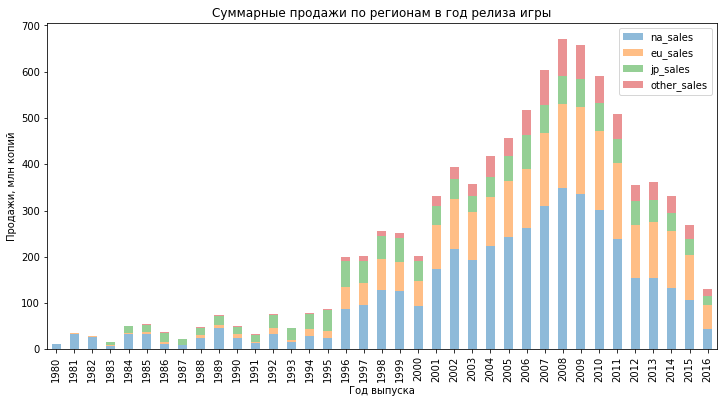

In [36]:
fig, ax = plt.subplots()

(games
 .groupby('year_of_release')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
 .agg('sum')
 .plot(kind='bar',stacked=True, ax=ax, figsize=(12,6), alpha=0.5))

ax.set_title('Суммарные продажи по регионам в год релиза игры')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Год выпуска')
plt.show()

*Аномальных значений не выявлено. Самый большой рынок в Северной Америке, после него идет Европа, а рынок игр Японии сопоставим по продажам со всеми остальными ('other') странами.*

### Добавление столбца

Добавим к таблице еще один столбец с суммарными продажами по всем регионам

In [37]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

### Вывод

**Выполнена предобработка данных:**

- приведение к нижнему регистру названий столбцов
- удаление пропусков в столбцах name, genre, year_of_release так как они в сумме составляют меньше 2% всех данных
- в столбце rating значение K-A заменено на Е, согласно классификации ESRB
- в столбце rating пропуски связаны с фактом основания организации ESRB и поэтому, их заполнили условным обозначением "unrated"
- в столбце user_score "tbd" - аббревиатура используется, если какая-то информация еще не определена или решение по вопросу не принято, поэтому она заменена на пропуск.
- в столбцах user_score и critic_score пропуски связаны с временным промежутком (до 1995 года отметок не выставлялось), но заполнить мы их не можем, поэтому оставили без изменений.
- в столбце year_of_release тип данных изменен на целочисленный (int)
- в столбце user_score тип данных изменен на числовые значения, которые могут быть нецелыми (float)
- в столбце critic_score значения поделены на 10 и возвращены в таблицу
- добавлен столбец с суммарными продажами по всем регионам total_sales
- удален неявный дубликат с названием игры Madden NFL 13

## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы

Составим сводную таблицу по количеству игр на разных платформах в разные годы

In [38]:
games_years = games.pivot_table(index = 'platform', 
                                columns = 'year_of_release', 
                                values = 'name', 
                                aggfunc='count',
                                fill_value=0,
                                margins=True
                               ).reset_index()
                               
pd.set_option('display.max_columns', None)
games_years

year_of_release,platform,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
0,2600,9,46,36,11,1,1,2,6,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116
1,3DO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,3DS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,93,91,80,86,46,512
3,DC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,14,20,8,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,52
4,DS,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,118,201,376,492,403,323,153,23,8,0,0,0,2121
5,GB,0,0,0,0,0,0,0,0,1,10,3,9,7,0,3,4,6,8,8,11,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97
6,GBA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,107,198,150,175,135,39,6,0,0,0,0,0,0,0,0,0,811
7,GC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,152,144,83,97,40,4,0,0,0,0,0,0,0,0,0,542
8,GEN,0,0,0,0,0,0,0,0,0,0,1,1,6,7,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27
9,GG,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Посмотрим данные по всем платформам по годам

In [39]:
games_years[games_years['platform'] == 'All']

year_of_release,platform,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
31,All,9,46,36,17,14,14,21,16,15,17,16,41,43,60,121,219,263,289,379,338,350,482,829,775,762,939,1006,1197,1427,1426,1255,1136,652,544,581,606,502,16443


Посмотрим на каких платформах выпускалось больше всего игр

In [40]:
games_years[['platform', 'All']].sort_values(by='All', ascending=False).head(6)

year_of_release,platform,All
31,All,16443
16,PS2,2127
4,DS,2121
17,PS3,1305
26,Wii,1286
28,X360,1232


Свизуализируем данные, как распределялось по годам количество выпущенных игр в разных платформах

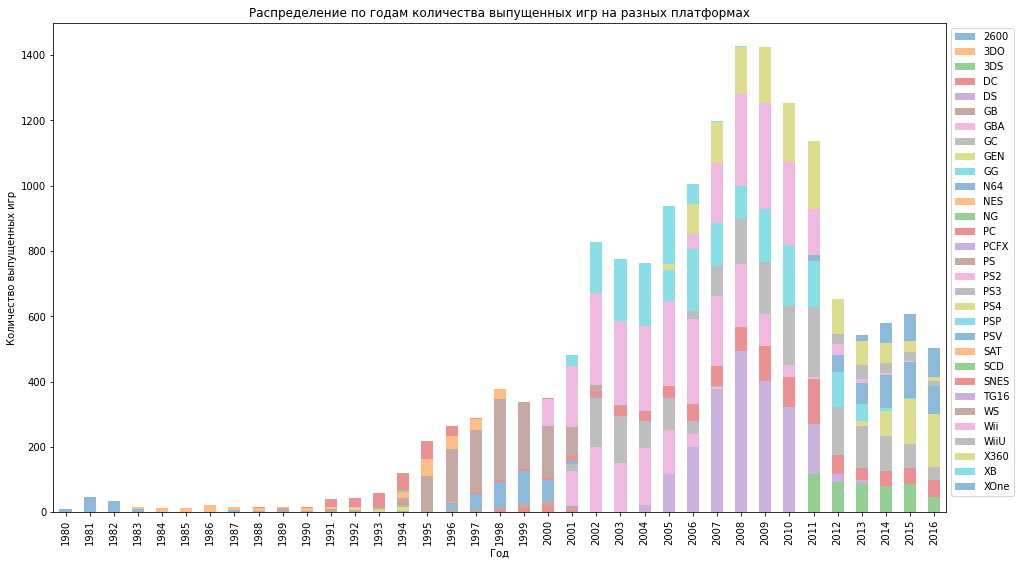

In [41]:
fig, ax = plt.subplots(figsize=(20, 10))

games.pivot_table(index='platform',
              columns='year_of_release',
              values='name',
              aggfunc='count').T.plot(kind='bar',stacked=True, ax=ax, figsize=(16,9), alpha=0.5)
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Год')
ax.set_ylabel('Количество выпущенных игр')
ax.set_title('Распределение по годам количества выпущенных игр на разных платформах')

plt.show()

**Можно сделать выводы о том, что наибольшее количество игр выпускалось в промежутке с 2002-го по 2011-й годы, и наибольшее количество игр выпустили платформы PS2, PS3, DS , Wii, X360.**

### Изменение продаж по платформам. Выбраны платформы с наибольшими суммарными продажами и построено распределение по годам. Определен характерный срок за который появляются новые и исчезают старые платформы

In [42]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unrated,31.38


Определим ТОП-10 платформ с наибольшими суммарными продажами.

In [43]:
games.groupby('platform').sum()[['total_sales']].reset_index().sort_values(
    by='total_sales', ascending=False
).head(10)

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.33
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


На примере платформ с наибольшими суммарными продажами построим распределение продаж по годам

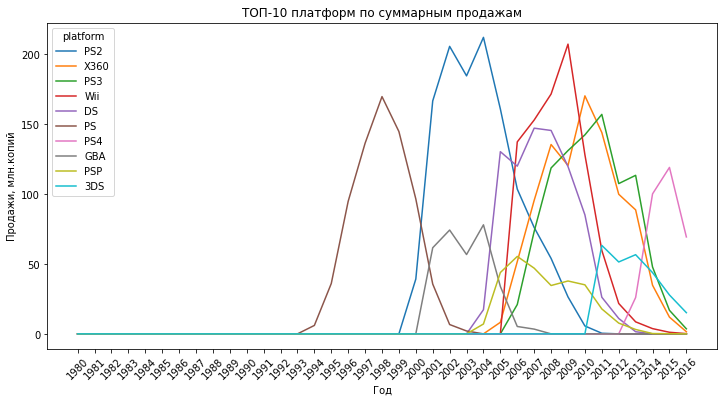

In [44]:
data_top_sales = games.pivot_table(
    index = 'year_of_release', 
    columns = 'platform',
    values = 'total_sales', 
    aggfunc = 'sum'
    ).fillna(0)

data_top_sales = data_top_sales[['PS2', 'X360','PS3','Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP' , '3DS']]
ax = data_top_sales.plot(xticks=data_top_sales.index,figsize=(12,6))
plt.xticks(rotation = 45) 
ylab = ax.set_ylabel('Продажи, млн.копий')
xlab = ax.set_xlabel('Год')
plt.title('ТОП-10 платформ по суммарным продажам')
plt.show()   

Построим тот же график для ТОП-5

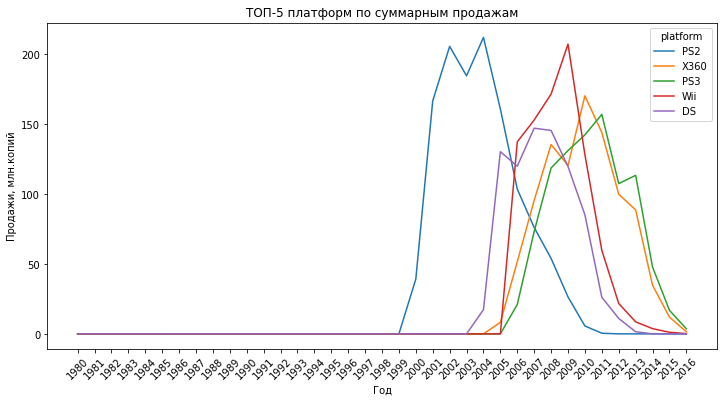

In [45]:
data_top_sales = games.pivot_table(
    index = 'year_of_release', 
    columns = 'platform',
    values = 'total_sales', 
    aggfunc = 'sum'
    ).fillna(0)

data_top_sales = data_top_sales[['PS2', 'X360','PS3','Wii', 'DS']]
ax = data_top_sales.plot(xticks=data_top_sales.index,figsize=(12,6))
plt.xticks(rotation = 45) 
ylab = ax.set_ylabel('Продажи, млн.копий')
xlab = ax.set_xlabel('Год')
plt.title('ТОП-5 платформ по суммарным продажам')
plt.show()   

**В ТОП-5 платформ по продажам входит:PS2, X360, PS3, Wii, DS.** 

Определим продолжительность жизни платформ

Создадим сводную таблицу и переименуем столбцы

In [46]:
life_time = games.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
life_time.set_axis(['platform', 'first_year', 'last_year'], axis='columns', inplace=True)

Возьмем за условие, что самая первая игра выходит 1 января, и при подсчете продолжительности жизни платформы добавим единицу, тогда если есть платформы которые выпустили первую и последнюю игру в один и тот же год, он будет засчитан как целый

In [47]:
life_time['length'] = life_time.last_year - life_time.first_year + 1
display(life_time['length'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]))

count    31.000000
mean      8.612903
std       6.998464
min       1.000000
5%        1.000000
25%       4.000000
50%       7.000000
75%      11.000000
95%      21.500000
99%      31.100000
max      32.000000
Name: length, dtype: float64

Посмотрим на платформу долгожителя

In [48]:
display(life_time[life_time['length'] == 32])

,platform,first_year,last_year,length
13,PC,1985,2016,32


 **При учете всех данных о платформах средняя продолжительность жизни платформы составляет около 9 лет,а медианная - 7 лет**

Сравним эти цифры с самыми популярными платформами

In [49]:
life_time.query('platform in @data_top_sales')['length'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99])

count     5.000000
mean     15.000000
std       7.842194
min      11.000000
5%       11.000000
25%      11.000000
50%      12.000000
75%      12.000000
95%      25.600000
99%      28.320000
max      29.000000
Name: length, dtype: float64

**Средняя продолжительность жизни платформы составляет 9-11 лет, пик продаж, по визуализации данных, приходится примерно на середину этого срока.** 

*Таким образом,для прогнозирования продаж нас интересуют те, что вышли не более 5 лет назад, у них есть еще время до пика продаж и даже после пика, на моменте спада продаж, они по-прежнему будут еще приносить прибыль.**

Отфильтруем данные за период с 2012 по 2016 гг, чтобы понять какие платформы пронозируемо окажутся в лидерах продаж

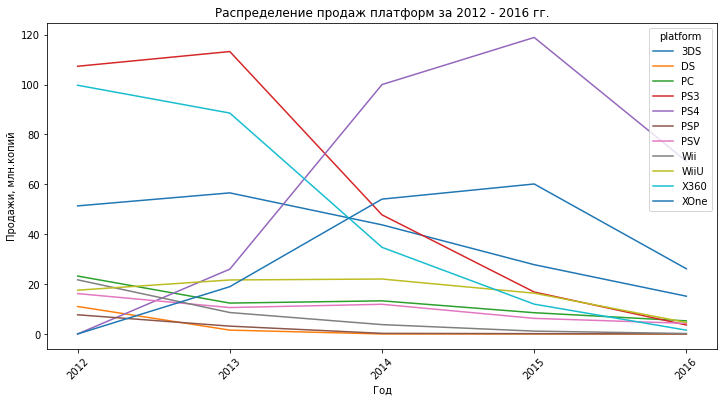

In [50]:
data_sales = games.query('year_of_release >= 2012').pivot_table(
    index = 'year_of_release', 
    columns = 'platform',
    values = 'total_sales', 
    aggfunc = 'sum'
    ).fillna(0)

ax = data_sales.plot(xticks=data_sales.index,figsize=(12,6))
plt.xticks(rotation = 45)
ylab = ax.set_ylabel('Продажи, млн.копий')
xlab = ax.set_xlabel('Год')
plt.title('Распределение продаж платформ за 2012 - 2016 гг.')
plt.show()   

**По графику видно, что потенциально прибыльными платформами являются PS 4 и XOne. Еще недолгое время будут продаваться игры на платформах 3DS, Wii U, X360 и PS 3, PC.** 

### Лидирующие по продажам платформы. Выбор нескольких потенциально прибыльных платформ.

Составим таблицу с данными потенциально прибыльных платформ за период с 2012 по 2016 гг.

In [51]:
games_top = games.query('year_of_release >= 2012 & platform in ["PS4", "XOne", "PS3", "X360", "WiiU", "3DS", "PC"]')
games_top.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,9.7,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,9.7,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unrated,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unrated,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,8.3,5.3,M,13.79


### Построен график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

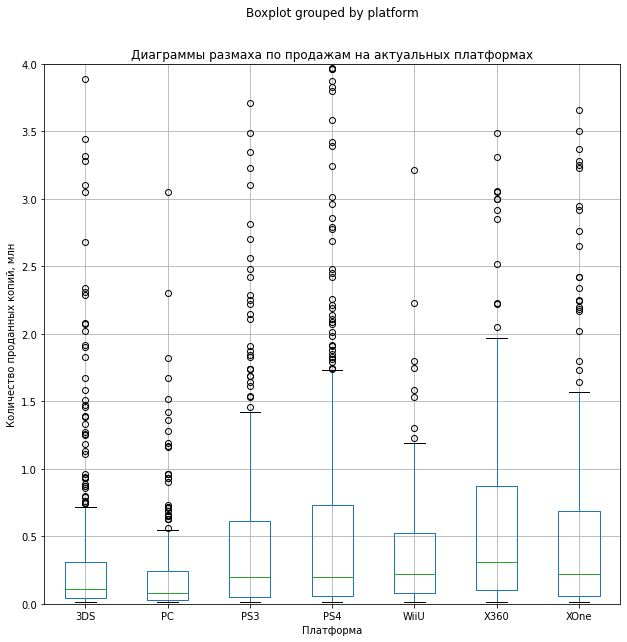

In [52]:
(games_top[['platform', 'name', 'total_sales']]
 .boxplot(column='total_sales', by='platform', figsize=(10,10))
)
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам на актуальных платформах')
plt.ylim(0, 4)
plt.show()

In [53]:
display(games_top.pivot_table(index='platform', values='total_sales', aggfunc=['sum', 'mean', 'median', 'std', 'count']).sort_values(('median', 'total_sales'), ascending=False))

,sum,mean,median,std,count
,total_sales,total_sales,total_sales,total_sales,total_sales
platform,,,,,
X360,236.54,0.810068,0.31,1.712069,292
WiiU,82.19,0.559116,0.22,1.058836,147
XOne,159.32,0.645020,0.22,1.036139,247
PS4,314.14,0.801378,0.20,1.609456,392
PS3,288.78,0.586951,0.20,1.464113,492
3DS,194.61,0.491439,0.11,1.387161,396
PC,62.65,0.250600,0.08,0.494640,250


**Поскольку количество игр на разных платформах действительно может быть разное, по графику видно, что Х360 имеет самый большой размах значений а также и медиану. Это значит, что продажи сильно варьируются, и можно сказать, что эта платформа, также как и PS4 очень популярна у пользователей. .** 

**Медиана продаж для каждой из платформ меньше 1 млн.**

**Выбросы вероятно свидетельствуют о наличие очень популярных игр, которые становятся хитами и приносят значительную прибыль.
У платформы PS4 таких "хитов" наблюдается значительное количество.**

### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков. Построена диаграмма рассеяния и посчитана корреляция между отзывами и продажами. 

Посмотрим на среднее по оценкам из выбранных перспективных платформ за период с 2012 по 2016 гг.

In [54]:
games_top.groupby('platform')[['user_score', 'critic_score']].agg('mean').round(2)

,user_score,critic_score
platform,,
3DS,7.03,6.98
PC,6.43,7.58
PS3,6.54,7.15
PS4,6.75,7.21
WiiU,6.90,7.07
X360,6.22,7.09
XOne,6.52,7.33


**Подсчитаем коэффициент корреляции между глобальными продажами и оценками критиков и пользователей для платформы PS4.**

In [55]:
games_select = games_top.query('platform == "PS4"') 

print(f'Корреляция между оценкой критиков и продажами: {games_select.critic_score.corr(games_select.total_sales):.2}')
print(f'Корреляция между оценкой пользователей и продажами: {games_select.user_score.corr(games_select.total_sales):.2}')

Корреляция между оценкой критиков и продажами: 0.41
Корреляция между оценкой пользователей и продажами: -0.032


Построим график рассеивания

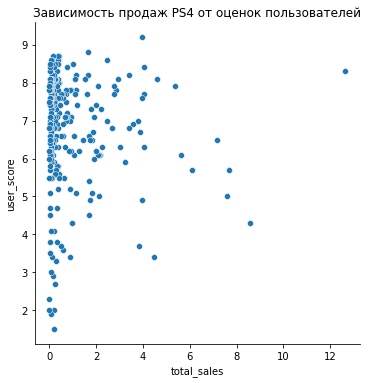

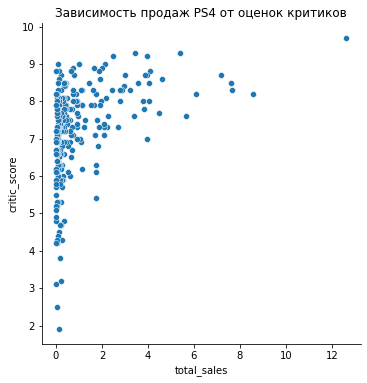

In [56]:
sns.relplot(x='total_sales', y='user_score',data=games_top.query('platform == "PS4"'))
plt.title('Зависимость продаж PS4 от оценок пользователей')
sns.relplot(x='total_sales', y='critic_score',data=games_top.query('platform == "PS4"'))
plt.title('Зависимость продаж PS4 от оценок критиков')
plt.show()

Корреляция между оценками критиков и продажами - умеренная (0.3-0.5 по шкале Чеддока), а вот связи между оценкой пользователей и продажами не наблюдается, так как корреляция практически равна нулю.

**Подсчитаем коэффициент корреляции между глобальными продажами и оценками критиков для платформы X360.**

In [57]:
games_select_x360 = games_top.query('platform == "X360"') 

print(f'Корреляция между оценкой критиков и продажами: {games_select_x360.critic_score.corr(games_select_x360.total_sales):.2}')
print(f'Корреляция между оценкой пользователей и продажами: {games_select_x360.user_score.corr(games_select_x360.total_sales):.2}')

Корреляция между оценкой критиков и продажами: 0.36
Корреляция между оценкой пользователей и продажами: 0.0062


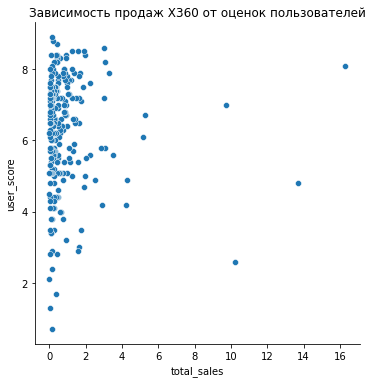

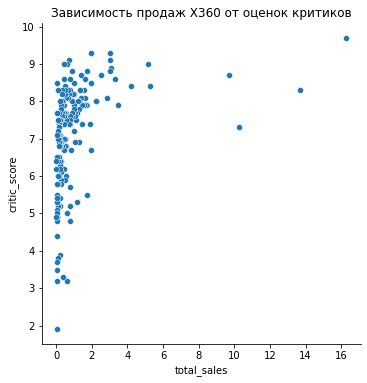

In [58]:
sns.relplot(x='total_sales', y='user_score',data=games_top.query('platform == "X360"'))
plt.title('Зависимость продаж X360 от оценок пользователей')
sns.relplot(x='total_sales', y='critic_score',data=games_top.query('platform == "X360"'))
plt.title('Зависимость продаж X360 от оценок критиков')
plt.show()

Корреляция между оценками критиков и продажами - умеренная (0.3-0.5 по шкале Чеддока), а между оценкой пользователей и продажами - отсутствует.

### Соотнесение выводов с продажами игр на других платформах.

Проверим как влияют оценки пользователей и критиков на всех перспективных платформах.

In [59]:
platform_list = ['3DS', 'PS3','WiiU', 'PC', 'XOne']

def score_info(plt):
    print('Корреляция по продажам и оценкам критиков:')
    display(games_top.query('platform == @plt' )['total_sales']
         .corr(games_top.query('platform == @plt')['critic_score']))                                            
    (
    games_top.query('platform == @plt')
        .plot.scatter(y='critic_score', x='total_sales', grid=True,alpha=0.3,
                     title = 'Влияние оценок критиков', ylabel='Оценка критиков', xlabel = 'продажи')
    )
    print('Корреляция по продажам и оценкам пользователей:')
    display(games_top.query('platform == @plt')['total_sales']
         .corr(games_top.query('platform == @plt')['user_score']))                                            
    (
    games_top.query('platform == @plt')
        .plot.scatter(y='user_score', x='total_sales', grid=True,alpha=0.3,
                     title = 'Влияние оценок пользователей', ylabel='Оценка пользователей', xlabel = 'продажи')
    )

Корреляция по продажам и оценкам критиков:


0.32080286953607856

Корреляция по продажам и оценкам пользователей:


0.19758263411038596

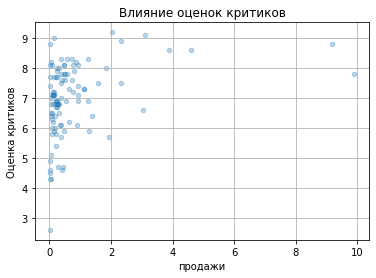

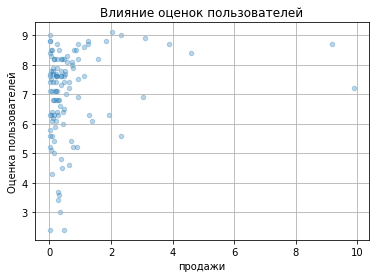

In [60]:
score_info('3DS')

Корреляция по продажам и оценкам критиков:


0.33415175755098575

Корреляция по продажам и оценкам пользователей:


-0.006205767686051522

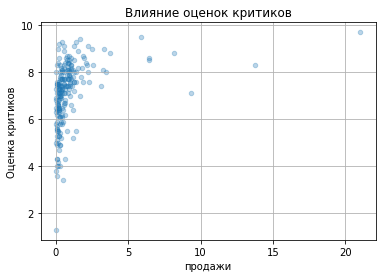

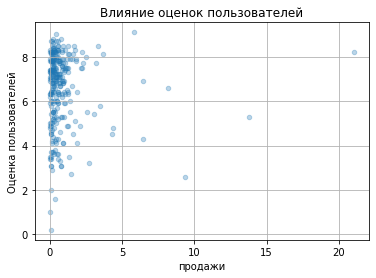

In [61]:
score_info('PS3')

Корреляция по продажам и оценкам критиков:


0.2372432431156794

Корреляция по продажам и оценкам пользователей:


-0.12186747630735577

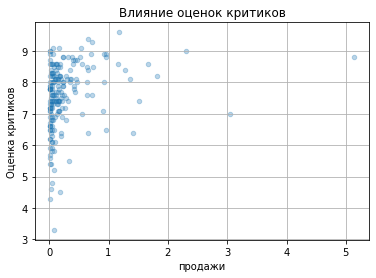

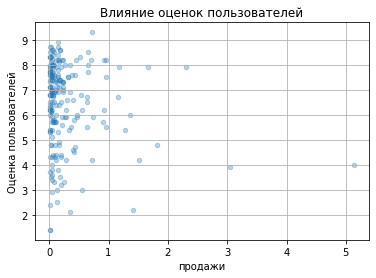

In [62]:
score_info('PC')

Корреляция по продажам и оценкам критиков:


0.3483797601201745

Корреляция по продажам и оценкам пользователей:


0.4002190202148617

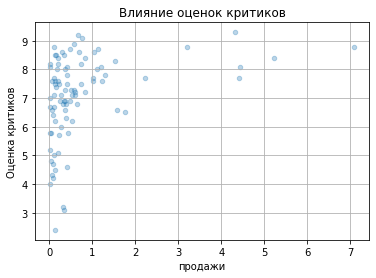

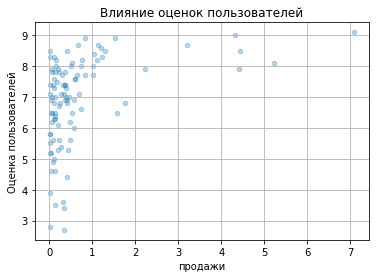

In [63]:
score_info('WiiU')

Корреляция по продажам и оценкам критиков:


0.4169983280084022

Корреляция по продажам и оценкам пользователей:


-0.06892505328279412

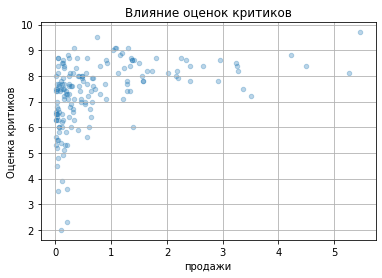

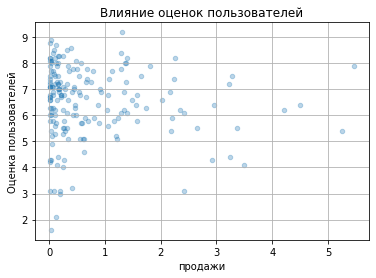

In [64]:
score_info('XOne')

**В целом наблюдается тенденция к общему выводу о том, что оценки критиков слабо или умеренно влияют на уровень продаж, а вот оценки пользователей не влияют вовсе, исключением является платформа WiiU . Возможно дело в том, что мнение экспертов в данной сфере является своего рода уровнем качества, однако многие платформы выпускают "хиты", тем самым повышаю уровень доверия у пользователей и повышают лояльность к покупателей, не смотря на оценки.**

### Общее распределение игр по жанрам. Прибыльные жанры. Выделение жанров с высокими и низкими продажами.

Посмотрим на перечень жанров еще раз

In [65]:
games_top['genre'].value_counts()

Action          787
Role-Playing    253
Shooter         231
Sports          227
Adventure       153
Misc            143
Racing          105
Fighting         91
Platform         73
Simulation       73
Strategy         59
Puzzle           21
Name: genre, dtype: int64

Составим сводную таблицу по жанрам, платформам и уровню продаж

In [66]:
games_top.pivot_table(
    index = 'genre',
    columns = 'platform',
    values = 'total_sales',
    aggfunc='sum',
    margins=True
).fillna(0).sort_values(
    by='All', 
    ascending=False
)

platform,3DS,PC,PS3,PS4,WiiU,X360,XOne,All
genre,,,,,,,,
All,194.61,62.65,288.78,314.14,82.19,236.54,159.32,1338.23
Action,45.49,13.14,115.75,96.10,19.07,81.60,37.31,408.46
Shooter,0.13,14.27,60.39,88.56,6.01,72.70,60.33,302.39
Sports,4.23,3.26,44.83,55.61,3.16,36.39,26.74,174.22
Role-Playing,79.30,13.65,22.62,28.99,2.89,9.80,10.55,167.80
Misc,9.45,0.73,8.88,8.19,12.46,14.83,7.43,61.97
Platform,19.11,0.14,4.26,7.69,21.53,2.14,0.93,55.80
Racing,0.28,1.23,11.56,12.14,7.87,8.41,9.79,51.28
Fighting,8.46,0.12,11.00,8.65,6.27,4.97,2.45,41.92


Свизуализируем данные - какие жанры в каких регионах как продавались

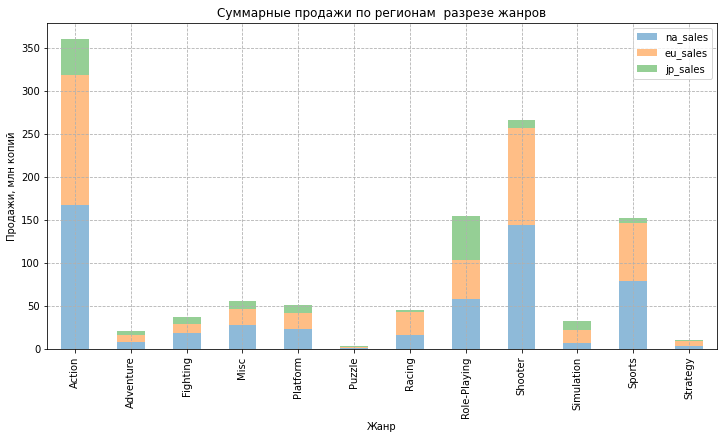

In [67]:
fig, ax = plt.subplots()

(games_top
 .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']]
 .agg('sum')
 .plot(kind='bar',stacked=True, ax=ax, figsize=(12,6), alpha=0.5))

ax.set_title('Суммарные продажи по регионам  разрезе жанров')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Жанр')
ax.grid(linestyle='--')
plt.show()

**В разрезе суммарных продаж самыми популярными жанрами являются - Action, Shooter и Sports. А самыми непопулярными - Adventure, Strategy и Puzzle.**

Свизуализируем данные для среднего по продажам 

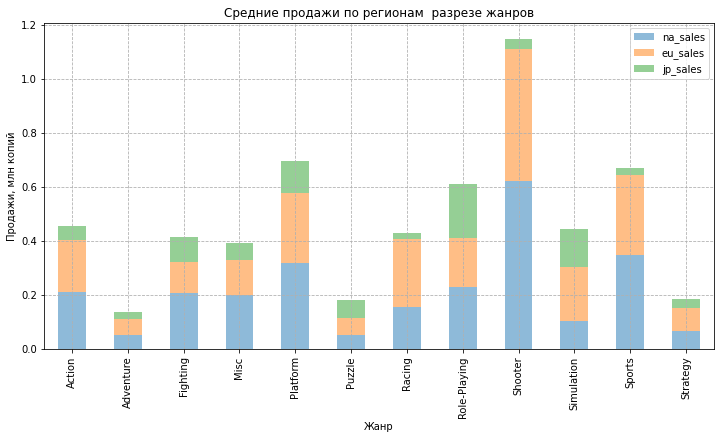

In [68]:
fig, ax = plt.subplots()

(games_top
 .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']]
 .agg('mean')
 .plot(kind='bar',stacked=True, ax=ax, figsize=(12,6), alpha=0.5))

ax.set_title('Средние продажи по регионам  разрезе жанров')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Жанр')
ax.grid(linestyle='--')
plt.show()

**В разрезе среднего по продажам самыми популярными жанрами являются - Platform, Shooter и Sports. А самыми непопулярными также - Adventure, Strategy и Puzzle.**

Посмотрим на данные в виде таблицы

In [69]:
display(games_top
        .pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'mean', 'median', 'std', 'count'])
        .reset_index().sort_values(('median', 'total_sales'), ascending=False))

,genre,sum,mean,median,std,count
,,total_sales,total_sales,total_sales,total_sales,total_sales
8,Shooter,302.39,1.309048,0.43,2.269098,231
10,Sports,174.22,0.767489,0.36,1.210454,227
4,Platform,55.80,0.764384,0.24,1.446437,73
7,Role-Playing,167.80,0.663241,0.20,1.485958,253
2,Fighting,41.92,0.460659,0.18,0.986495,91
0,Action,408.46,0.519009,0.16,1.313317,787
6,Racing,51.28,0.488381,0.16,0.922474,105
3,Misc,61.97,0.433357,0.15,1.047902,143
9,Simulation,34.58,0.473699,0.12,1.298055,73


Можно сделать вывод о том, что самыми популярными жанрами являются Action, Shooter, Sports и  Platform. Все эти жанры захватывают внимание зрителя, активные, отвечают социальным интересам о спорте, оружие, преодолении препятствий на пути к цели, действии.

Самыми не популярными жанрами являются - Adventure, Strategy и Puzzle. Эти жанры более пассивные, задействуют другие области, такие как терпеливость, находчивость, смекалку.

Исходя из анализа очевидно, что пользователь рассматривает компьютерные игры как средства отдыха, расслабления, отвлечения, без линих умственных нагрузок, а ожидает эмоциональных ощущений впервую очередь.

### Вывод

**Можно сделать выводы о том, что:**

- наибольшее количество игр выпускалось в промежутке с 2002-го по 2011-й годы, и наибольшее количество игр выпустили платформы PS2, PS3, DS , Wii, X360

- в ТОП-5 платформ по продажам входит:PS2, X360, PS3, Wii, DS

- средняя продолжительность жизни платформы составляет 9-11 лет, пик продаж, по визуализации данных, приходится примерно на середину этого срока

- потенциально прибыльными платформами являются PS 4 и XOne. Еще недолгое время будут продаваться игры на платформах 3DS, Wii U, X360 и PS 3, PC.

- оценки критиков слабо или умеренно влияют на уровень продаж, а вот оценки пользователей влияют значительно слабее оценок критиков или не влияют вовсе. Возможно дело в том, что мнение экспертов в данной сфере является своего рода уровнем качества, однако многие платформы выпускают "хиты", тем самым повышаю уровень доверия у пользователей и повышают лояльность к покупателей, не смотря на оценки

- самыми популярными жанрами являются Action, Shooter, Sports и  Platform. Все эти жанры захватывают внимание зрителя, активные, отвечают социальным интересам о спорте, оружие, преодолении препятствий на пути к цели, действии.

- самыми не популярными жанрами являются - Adventure, Strategy и Puzzle. Эти жанры более пассивные, задействуют другие области, такие как терпеливость, находчивость, смекалку.

- исходя из анализа очевидно, что пользователь рассматривает компьютерные игры как средства отдыха, расслабления, отвлечения, без линих умственных нагрузок, а ожидает эмоциональных ощущений впервую очередь

## Портрет пользователя каждого региона

### Определение для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Описание различия в долях продаж.

Составим сводную таблицу по платформам и продажам по регионам с 2012 по 2016 гг.

In [70]:
games_top.pivot_table(
    index = 'platform',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).apply(
    lambda col: col / col.sum(), 
    axis=0
).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
platform,,,
3DS,8.9%,57.0%,9.9%
PC,7.9%,0.0%,3.4%
PS3,22.3%,22.9%,18.5%
PS4,29.4%,10.4%,19.5%
WiiU,5.2%,8.5%,6.8%
X360,15.5%,1.0%,25.1%
XOne,10.8%,0.2%,16.7%


array([<AxesSubplot:ylabel='jp_sales'>], dtype=object)

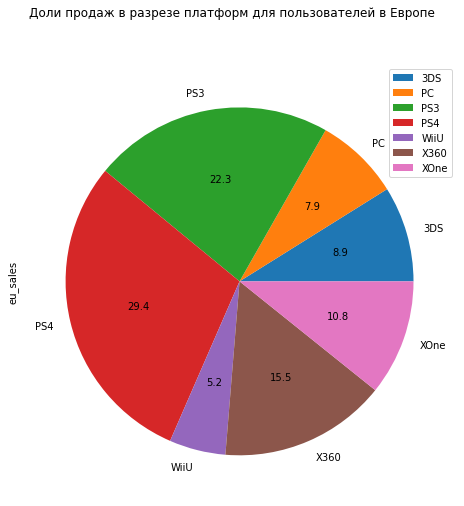

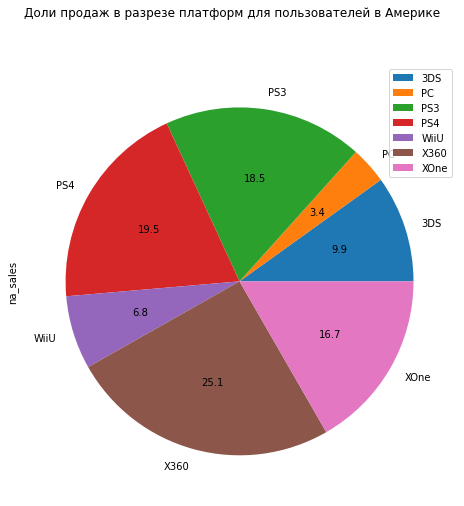

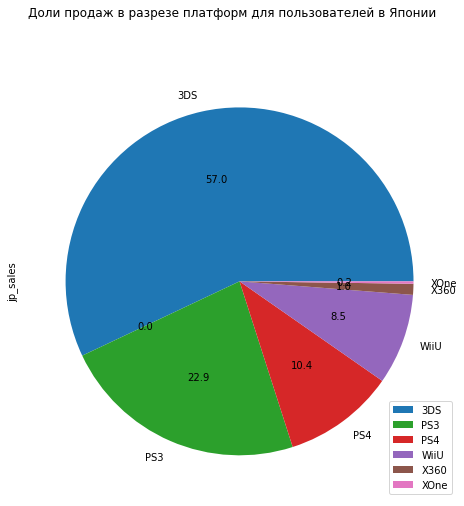

In [71]:
games_top.pivot_table(index = 'platform',values = ['eu_sales'],aggfunc = 'sum').plot(kind='pie', figsize=(8,8),subplots=True, legend = True,title = 'Доли продаж в разрезе платформ для пользователей в Европе', autopct='%.1f')
games_top.pivot_table(index = 'platform',values = ['na_sales'],aggfunc = 'sum').plot(kind='pie', figsize=(8,8),subplots=True, legend = True,title = 'Доли продаж в разрезе платформ для пользователей в Америке', autopct='%.1f')
games_top.pivot_table(index = 'platform', values = ['jp_sales'],aggfunc = 'sum').plot(kind='pie', figsize=(8,8),subplots=True, legend = True,title = 'Доли продаж в разрезе платформ для пользователей в Японии', autopct='%.1f')

Данные наглядно демонстрируют предпочтения в рынках разных стран:

- Европейсике пользователи предпочитают Sony PlayStation (PS3, PS 4), далее  Microsoft XBox (X360,XOne) и Nintendo (3DS)
- Японские пользователи предпочитают Nintendo (3DS), далее Sony PlayStation (PS3, PS 4) и WiiU
- Американские пользователи предпочитают  Microsoft XBox (X360,XOne), далее Sony PlayStation (PS3, PS 4) и Nintendo (3DS)

### Определение для пользователя каждого региона (NA, EU, JP): Самые популярные жанры.

Составим сводную таблицу по жанрам и продажам по регионам с 2012 по 2016 гг.

In [72]:
games_top.pivot_table(
    index = 'genre',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).apply(
    lambda col: col / col.sum(), 
    axis=0
).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
genre,,,
Action,31.5%,27.3%,30.0%
Adventure,1.8%,2.8%,1.5%
Fighting,2.2%,5.5%,3.4%
Misc,3.8%,5.9%,5.1%
Platform,4.0%,5.6%,4.2%
Puzzle,0.3%,0.9%,0.2%
Racing,5.5%,1.6%,3.0%
Role-Playing,9.5%,32.7%,10.5%
Shooter,23.5%,5.9%,25.8%


array([<AxesSubplot:ylabel='jp_sales'>], dtype=object)

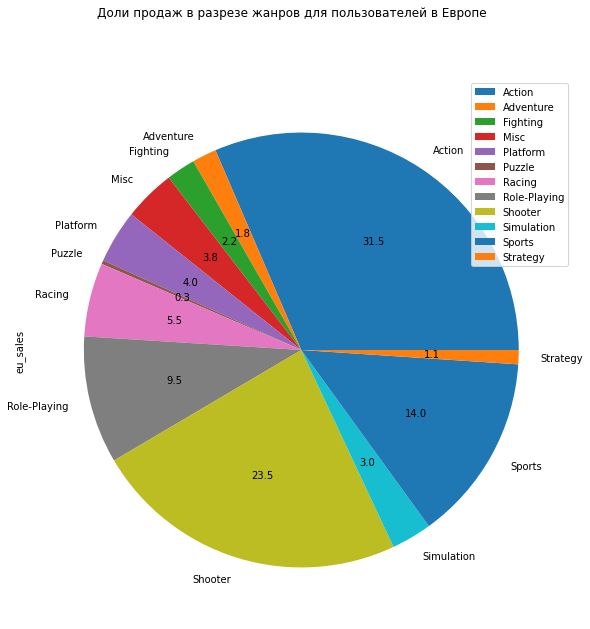

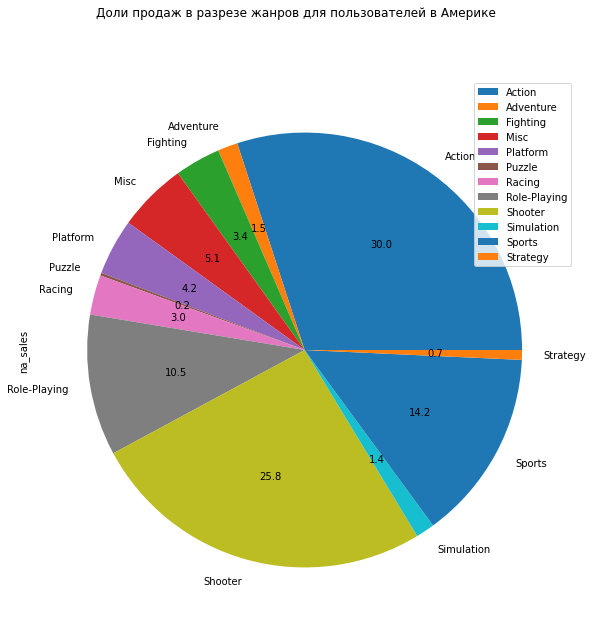

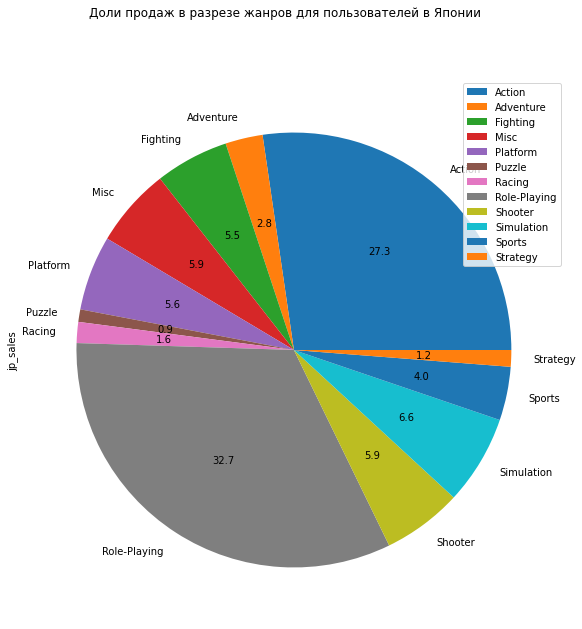

In [73]:
games_top.pivot_table(index = 'genre',values = ['eu_sales'],aggfunc = 'sum').plot(kind='pie', figsize=(10,10),subplots=True, legend = True,title = 'Доли продаж в разрезе жанров для пользователей в Европе', autopct='%.1f')
games_top.pivot_table(index = 'genre',values = ['na_sales'],aggfunc = 'sum').plot(kind='pie', figsize=(10,10),subplots=True, legend = True,title = 'Доли продаж в разрезе жанров для пользователей в Америке', autopct='%.1f')
games_top.pivot_table(index = 'genre', values = ['jp_sales'],aggfunc = 'sum').plot(kind='pie', figsize=(10,10),subplots=True, legend = True,title = 'Доли продаж в разрезе жанров для пользователей в Японии', autopct='%.1f')

Данные наглядно демонстрируют предпочтения в рынках разных стран:

- Европейсике пользователи предпочитают игры в жанрах Action, Shooter,Sports 
- Японские пользователи предпочитают игры в жанрах Action, Role-Playing, Simulation
- Американские пользователи предпочитают игры в жанрах Action, Shooter,Sports 

**Анализируя данные можно сказать о том, что интерсы пользователей в Северной Америке и Европе достаточно схожи - они предпочитают Action, Shooter,Sports. Однако при этом выбирают разные платформы для игры, если в Америке отдают выбор родному производителю Microsoft XBox (X360,XOne), то в Европе - Sony PlayStation (PS3, PS 4). Японский потребитель  значительно отличается от потребителя в Северной Америке и Европе, отдавая предпочтения жанрам  Action, Role-Playing, Simulation выбирая платформу  Nintendo (3DS).**

### Определение для пользователя каждого региона (NA, EU, JP): Влияние ли рейтинга ESRB на продажи в отдельном регионе.

Составим сводную таблицу по рейтингу ESRB и продажам по регионам с 2012 по 2016 гг.

In [74]:
games_top.pivot_table(
    index = 'rating',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).apply(
    lambda col: col / col.sum(), 
    axis=0
).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
rating,,,
E,22.2%,17.3%,19.5%
E10+,9.3%,4.9%,10.9%
M,39.9%,12.5%,40.8%
T,10.6%,13.0%,11.4%
unrated,18.0%,52.3%,17.4%


array([<AxesSubplot:ylabel='jp_sales'>], dtype=object)

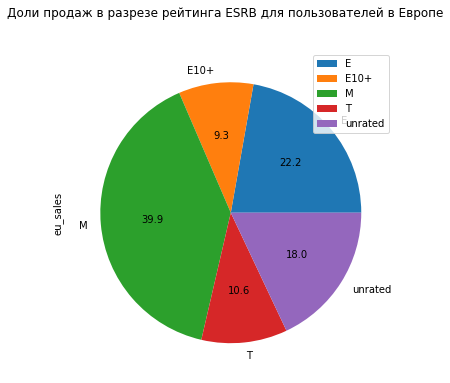

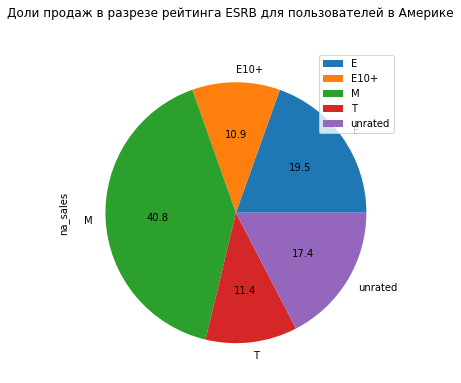

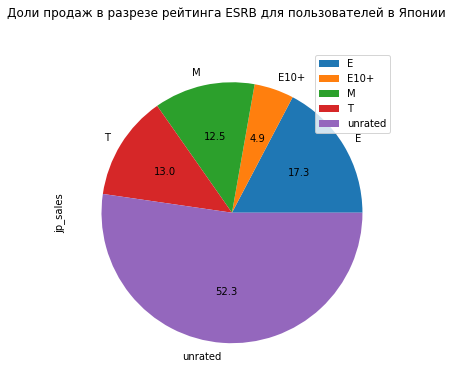

In [75]:
games_top.pivot_table(index = 'rating',values = ['eu_sales'],aggfunc = 'sum').plot(kind='pie', figsize=(6,6),subplots=True, legend = True,title = 'Доли продаж в разрезе рейтинга ESRB для пользователей в Европе', autopct='%.1f')
games_top.pivot_table(index = 'rating',values = ['na_sales'],aggfunc = 'sum').plot(kind='pie', figsize=(6,6),subplots=True, legend = True,title = 'Доли продаж в разрезе рейтинга ESRB для пользователей в Америке', autopct='%.1f')
games_top.pivot_table(index = 'rating', values = ['jp_sales'],aggfunc = 'sum').plot(kind='pie', figsize=(6,6),subplots=True, legend = True,title = 'Доли продаж в разрезе рейтинга ESRB для пользователей в Японии', autopct='%.1f')

**Европейсике пользователи предпочитают игры в категории M — Mature «Для взрослых», а также E — Everyone «Для всех» (содержание вполне подходит для возрастной категории от 6 лет, такие игры могут понравиться и взрослым).**

**Данные о рейтинге у японских пользователей в большинстве отсутствуют (52%), по оставшимся данным виден интерес также в категории Е, и Т — Teen «Подросткам». Возможно в Японии есть своя система оценки которая не учтена в данных.**

**Американские пользователи предпочитают игры в категории М, Е и Т.**

### Вывод

Данные наглядно демонстрируют предпочтения в рынках разных стран:

- Европейсике пользователи предпочитают Sony PlayStation (PS3, PS 4), далее  Microsoft XBox (X360,XOne) и Nintendo (3DS). Игры в жанрах Action, Shooter,Sports в категории M — Mature «Для взрослых», а также E — Everyone «Для всех» (содержание вполне подходит для возрастной категории от 6 лет, такие игры могут понравиться и взрослым).

- Японские пользователи предпочитают Nintendo (3DS), далее Sony PlayStation (PS3, PS 4) и WiiU. Игры в жанрах Action, Role-Playing, Simulation в категории Е, и Т — Teen «Подросткам».

- Американские пользователи предпочитают  Microsoft XBox (X360,XOne), далее Sony PlayStation (PS3, PS 4) и Nintendo (3DS). Игры в жанрах Action, Shooter,Sports в категории М, Е и Т.

Анализируя данные можно сказать о том, что интерсы пользователей в Северной Америке и Европе достаточно схожи - они предпочитают Action, Shooter,Sports в категории для взрослых, и семейные. Однако при этом выбирают разные платформы для игры, если в Америке отдают выбор родному производителю Microsoft XBox (X360,XOne), то в Европе - Sony PlayStation (PS3, PS 4). Японский потребитель значительно отличается от потребителя в Северной Америке и Европе, отдавая предпочтения жанрам Action, Role-Playing, Simulation выбирая платформу Nintendo (3DS). Данные о рейтинге у японских пользователей в большинстве отсутствуют (52%), возможно в Японии есть своя система оценки которая не учтена в данных.

## Проверка гипотез

### Гипотеза №1 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Отфильтруем данные по платформам и пользовательским рейтингам и отфильтруем пропуски

In [76]:
display(games_top.query('platform in ["XOne", "PC"]').pivot_table(index='platform', values='user_score'))

,user_score
platform,
PC,6.428641
XOne,6.521429


In [77]:
 sample_1_xone=games_top[(games_top.platform == "XOne") & (games_top.user_score.notna())]['user_score']

In [78]:
sample_2_PC=games_top[(games_top.platform == "PC") & (games_top.user_score.notna())]['user_score']

Проверим количество данных

In [79]:
 sample_1_xone.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [80]:
sample_2_PC.describe()

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

Введем основную и альтернативные гипотезы:

**H0 (основная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC равны**

**H1 (альтернативная гипотеза) - средние пользовательские рейтинги платформы Xbox One и PC не равны** 

Итак, мы в ситуации когда нужно сравнить средние двух генеральных совокупностей, статистический тест отвечает на вопрос: достаточно ли большое различие мы наблюдаем с учетом разброса, чтобы отвергнуть нулевую гипотезу об их равенстве.

Будем использовать метод: scipy.stats.ttest_ind(array1, array2,equal_var,alternative)

In [81]:
alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(sample_1_xone,sample_2_PC) # двусторонний тест

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу') 

p-value: 0.5535080500643661
Нет оснований отвергнуть нулевую гипотезу


Посмотрим на данные в таблице

In [82]:
display(games_top.query('platform in ["XOne", "PC"]')
        .pivot_table(index='platform', values='user_score', aggfunc=['count', 'mean', 'median', 'var']))

,count,mean,median,var
,user_score,user_score,user_score,user_score
platform,,,,
PC,206,6.428641,6.8,2.770444
XOne,182,6.521429,6.8,1.906997


Свизуализируем данные на графике

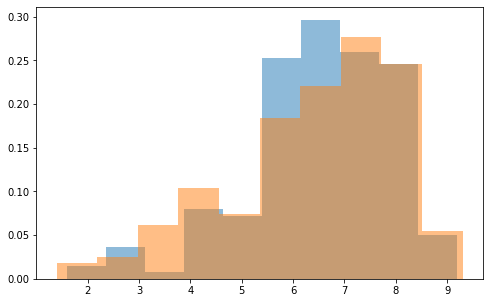

In [83]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(sample_1_xone, bins=10, density=True, alpha=0.5)
ax.hist(sample_2_PC, bins=10, density=True, alpha=0.5)
plt.show()

**Можно заключить, что средние пользовательские рейтинги платформ Xbox One и PC не разные, то есть они одинаковые со статистически незначимой разницей.**

### Гипотеза №2 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Отфильтруем данные по жанрам и пользовательским рейтингам и отфильтруем пропуски

In [84]:
sample_1_action=games_top[(games_top.genre == "Action") & (games_top.user_score.notna())]['user_score']

In [85]:
sample_2_sports=games_top[(games_top.genre == "Sports") & (games_top.user_score.notna())]['user_score']

Проверим количество данных

In [86]:
sample_1_action.describe()

count    469.000000
mean       6.808316
std        1.345535
min        2.000000
25%        6.200000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [87]:
sample_2_sports.describe()

count    181.000000
mean       5.420442
std        1.704788
min        0.200000
25%        4.300000
50%        5.700000
75%        6.700000
max        8.700000
Name: user_score, dtype: float64

Введем основную и альтернативные гипотезы:

**H0 (основная гипотеза) - cредние пользовательские рейтинги жанров Action и Sports равны.**

**H1 (альтернативная гипотеза) - cредние пользовательские рейтинги жанров Action и Sports не равны.** 

Итак, мы в ситуации когда нужно сравнить средние двух генеральных совокупностей, статистический тест отвечает на вопрос: достаточно ли большое различие мы наблюдаем с учетом разброса, чтобы отвергнуть нулевую гипотезу об их равенстве. Поскольку значения в жанре Action количественно значительно отличаются от значений в жанре Sports добавим equal_var = False.

Будем использовать метод: scipy.stats.ttest_ind(array1, array2,equal_var,alternative)

In [88]:
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(sample_1_action, sample_2_sports,equal_var = False) # двусторонний тест

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')    


p-value: 1.0297244588404634e-19
Отвергаем нулевую гипотезу


Посмотрим на данные в таблице

In [89]:
display(games_top.query('genre in ["Action", "Sports"]')
        .pivot_table(index='genre', values='user_score', aggfunc=['count', 'mean', 'median', 'var']))

,count,mean,median,var
,user_score,user_score,user_score,user_score
genre,,,,
Action,469,6.808316,7.1,1.810465
Sports,181,5.420442,5.7,2.906302


Свизуализируем данные

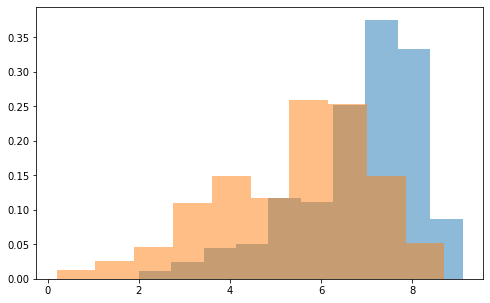

In [90]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(sample_1_action, bins=10, density=True, alpha=0.5)
ax.hist(sample_2_sports, bins=10, density=True, alpha = 0.5)
plt.show()

**Можно заключить, средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

### Вывод

**Гипотеза №1** - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Результат - Можно заключить, что средние пользовательские рейтинги платформ Xbox One и PC не разные, то есть они одинаковые со статистически незначимой разницей.

**Гипотеза №2** - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Результат - Можно заключить, средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Общий вывод

Исходный датафрейм содержит 16715 строк и 11 колонок.

**Описание данных:**

**Name** — название игры

**Platform** — платформа

**Year_of_Release** — год выпуска

**Genre** — жанр игры

**NA_sales** — продажи в Северной Америке (миллионы проданных копий)

**EU_sales** — продажи в Европе (миллионы проданных копий)

**JP_sales** — продажи в Японии (миллионы проданных копий)

**Other_sales** — продажи в других странах (миллионы проданных копий)

**Critic_Score** — оценка критиков (максимум 100)

**User_Score** — оценка пользователей (максимум 10)

**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Выполнена предобработка данных:**

- приведение к нижнему регистру названий столбцов
- удаление пропусков в столбцах name, genre, year_of_release так как они в сумме составляют меньше 2% всех данных
- в столбце rating значение K-A заменено на Е, согласно классификации ESRB
- в столбце rating пропуски связаны с фактом основания организации ESRB и поэтому, их заполнили условным обозначением "unrated"
- в столбце user_score "tbd" - аббревиатура используется, если какая-то информация еще не определена или решение по вопросу не принято, поэтому она заменена на пропуск.
- в столбцах user_score и critic_score пропуски связаны с временным промежутком (до 1995 года отметок не выставлялось), но заполнить мы их не можем, поэтому оставили без изменений.
- в столбце year_of_release тип данных изменен на целочисленный (int)
- в столбце user_score тип данных изменен на числовые значения, которые могут быть нецелыми (float)
- в столбце critic_score значения поделены на 10 и возвращены в таблицу
- добавлен столбец с суммарными продажами по всем регионам total_sales
- удален неявный дубликат с названием игры Madden NFL 13

**Можно сделать выводы о том, что:**

- наибольшее количество игр выпускалось в промежутке с 2002-го по 2011-й годы, и наибольшее количество игр выпустили платформы PS2, PS3, DS , Wii, X360

- в ТОП-5 платформ по продажам входит:PS2, X360, PS3, Wii, DS

- средняя продолжительность жизни платформы составляет 9-11 лет, пик продаж, по визуализации данных, приходится примерно на середину этого срока

- потенциально прибыльными платформами являются PS 4 и XOne. Еще недолгое время будут продаваться игры на платформах 3DS, Wii U, X360 и PS 3, PC.

- оценки критиков слабо или умеренно влияют на уровень продаж, а вот оценки пользователей не влияют вовсе. Возможно дело в том, что мнение экспертов в данной сфере является своего рода уровнем качества, однако многие платформы выпускают "хиты", тем самым повышаю уровень доверия у пользователей и повышают лояльность к покупателей, не смотря на оценки

- самыми популярными жанрами являются Action, Shooter, Sports и  Platform. Все эти жанры захватывают внимание зрителя, активные, отвечают социальным интересам о спорте, оружие, преодолении препятствий на пути к цели, действии.

- самыми не популярными жанрами являются - Adventure, Strategy и Puzzle. Эти жанры более пассивные, задействуют другие области, такие как терпеливость, находчивость, смекалку.

- исходя из анализа очевидно, что пользователь рассматривает компьютерные игры как средства отдыха, расслабления, отвлечения, без линих умственных нагрузок, а ожидает эмоциональных ощущений впервую очередь

**Данные наглядно демонстрируют предпочтения в рынках разных стран:**

- Европейсике пользователи предпочитают Sony PlayStation (PS3, PS 4), далее  Microsoft XBox (X360,XOne) и Nintendo (3DS). Игры в жанрах Action, Shooter,Sports в категории M — Mature «Для взрослых», а также E — Everyone «Для всех» (содержание вполне подходит для возрастной категории от 6 лет, такие игры могут понравиться и взрослым).

- Японские пользователи предпочитают Nintendo (3DS), далее Sony PlayStation (PS3, PS 4) и WiiU. Игры в жанрах Action, Role-Playing, Simulation в категории Е, и Т — Teen «Подросткам».

- Американские пользователи предпочитают  Microsoft XBox (X360,XOne), далее Sony PlayStation (PS3, PS 4) и Nintendo (3DS). Игры в жанрах Action, Shooter,Sports в категории М, Е и Т.

Анализируя данные можно сказать о том, что интерсы пользователей в Северной Америке и Европе достаточно схожи - они предпочитают Action, Shooter,Sports в категории для взрослых, и семейные. Однако при этом выбирают разные платформы для игры, если в Америке отдают выбор родному производителю Microsoft XBox (X360,XOne), то в Европе - Sony PlayStation (PS3, PS 4). Японский потребитель значительно отличается от потребителя в Северной Америке и Европе, отдавая предпочтения жанрам Action, Role-Playing, Simulation выбирая платформу Nintendo (3DS). Данные о рейтинге у японских пользователей в большинстве отсутствуют (52%), возможно в Японии есть своя система оценки которая не учтена в данных.

**Проверка гипотез:**

**Гипотеза №1** - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Результат - Можно заключить, что средние пользовательские рейтинги платформ Xbox One и PC не разные, то есть они одинаковые со статистически незначимой разницей.

**Гипотеза №2** - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Результат - Можно заключить, средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**В общем и целом можно заключить, что продажи зависят от особенностей предпочтений потребителей в разных странах и в той или иной мере от оценок критиков. Перед выпуском нового продукта необходимо учитывать местоположение рынка сбыта для реализации, возрасной ценз игры, а также платформу под которую выпускается игра. Жизненный путь платформы не долговечен, каждые 9-11 лет необходимо выпускать новую платформу, для сохранения интереса потребителя. Для рынка Америки перспективные платформы выпускает производитель Microsoft, в то время как для европейского рынка - это Sony PlayStation, a для Японии - Nintendo. Американский и европейский пользователь предпочитает активные игры, в то время как японскому пользователю в том числе интересны игры задействующие симуляцию и самого пользователя в качестве новой роли. В качестве оценки прибыли на будущий год интересно изучить не только жанры игр, но и конкретные игры которые вызывают наибольший интерес у пользователя, возможно повысить количество выпущенных копий если спрос на них высок.**